In [1]:
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings("ignore")


#Create the connection with the date base
def create_connection():
    try:
        client = pymongo.MongoClient("mongodb://localhost:27017/")
        return client["IUM"], client # Change the database name for your name
    except pymongo.errors.ConnectionFailure as e:
        print(f"Connection failed: {e}")
        return None, None

#Close the connection with the database
def close_connection(client):
    # Close connection
    if client is not None:  # Check for None explicitly
        client.close()

db, client = create_connection()

In [2]:
#borrar???
def getPlayerId(db, name):
    try:
        collection = db["players"]
        query = {"name": name}
        playerId = list(collection.find(query))
        return playerId[0].get("player_id")
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

1.AVERAGE AGE OF THE TEAMS OF A CERTAIN COUNTRY

a. Function that given a competition id returns the club's names and its average_age.

In [3]:
def getClubNameAndAverageAge(db, competition):
    try:
        collection = db["clubs"]
        query = {"domestic_competition_id": competition}
        clubs = list(collection.find(query))
        club_info_list = [{"name": item.get("name"), "average_age": item.get("average_age")} for item in clubs]
        return club_info_list
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

In [4]:
clubsInfo = getClubNameAndAverageAge(db, "IT1")
print(clubsInfo)

[{'name': 'Associazione Sportiva Roma', 'average_age': 27.4}, {'name': 'Bologna Football Club 1909', 'average_age': 25.3}, {'name': 'Udinese Calcio', 'average_age': 25.1}, {'name': 'Palermo FC', 'average_age': 25.6}, {'name': 'Football Club Internazionale Milano S.p.A.', 'average_age': 29.0}, {'name': 'Spezia Calcio', 'average_age': 24.4}, {'name': 'Società Sportiva Calcio Napoli', 'average_age': 26.5}, {'name': 'Parma Calcio 1913', 'average_age': 24.9}, {'name': 'Cesena FC', 'average_age': 26.0}, {'name': 'SPAL', 'average_age': 26.0}, {'name': 'Verona Hellas Football Club', 'average_age': 25.8}, {'name': 'AC Carpi', 'average_age': 23.6}, {'name': 'U.S. Salernitana 1919 S.r.l.', 'average_age': 27.1}, {'name': 'Juventus Football Club', 'average_age': 26.7}, {'name': 'Associazione Calcio Monza', 'average_age': 27.0}, {'name': 'Società Sportiva Lazio S.p.A.', 'average_age': 27.4}, {'name': 'Benevento Calcio', 'average_age': 26.7}, {'name': 'Unione Sportiva Sassuolo Calcio', 'average_age':

Function that given the average age and the name of all teams in a competicion and draw a Bar chart

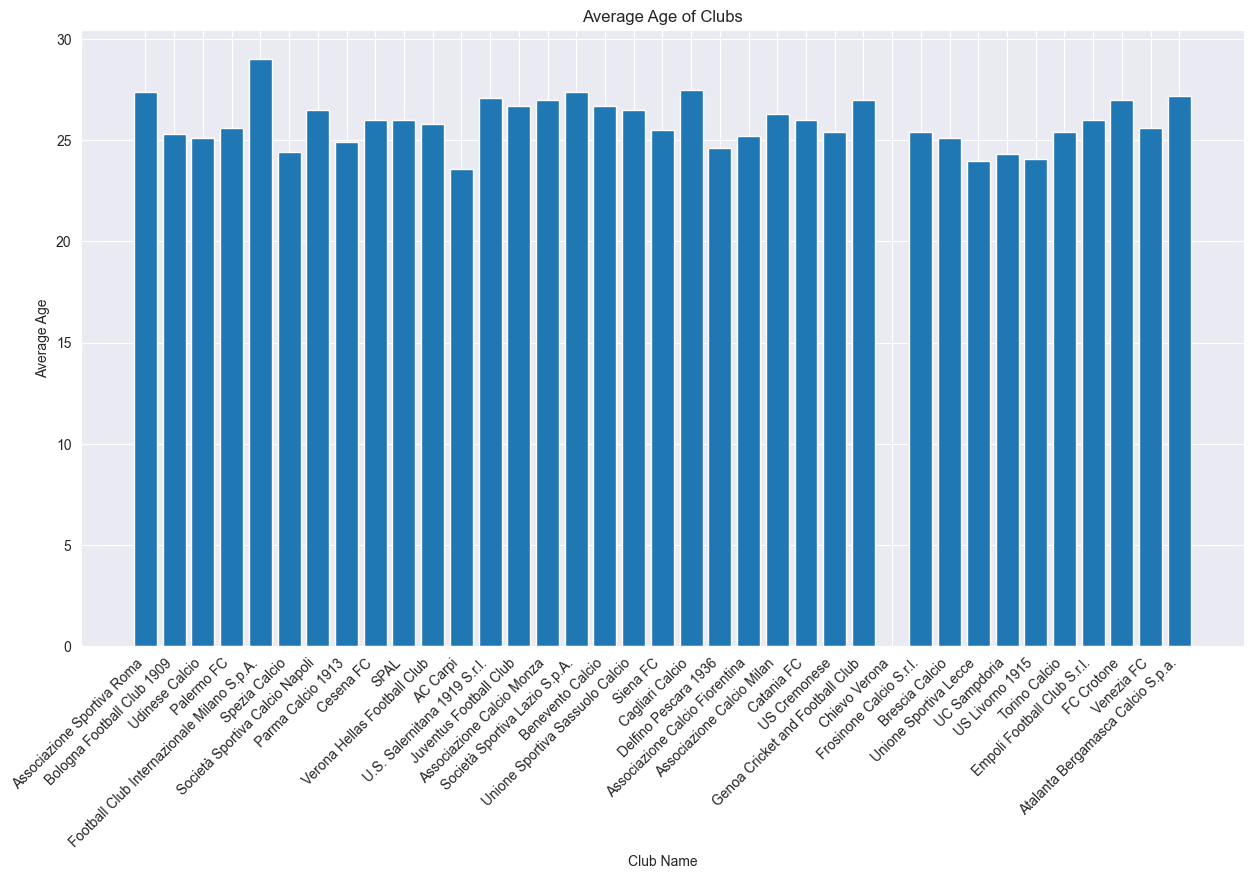

In [5]:
def plotBarChart(data):
    names = [item["name"] for item in data]
    average_ages = [item["average_age"] if item["average_age"] is not None else 0 for item in data]

    plt.figure(figsize=(15, 8))

    plt.bar(names, average_ages)
    plt.xlabel("Club Name")
    plt.ylabel("Average Age")
    plt.title("Average Age of Clubs")
    plt.xticks(rotation=45, ha="right")
    plt.show()

plotBarChart(clubsInfo)


2.FOR A GIVEN TEAM THEIR GOALS AT HOME AND AWAY DURING A YEAR

In [6]:
name = "Veria NPS"
year = 2015

Function to get the club id by the name

In [7]:
def getClubId(db, name):
    try:
        collection = db["clubs"]
        query = {"name": name}
        clubId = list(collection.find(query))
        return clubId[0].get("club_id")
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

Function that given a team id, a year and if is away or at home returns their favor goals and their against goals.

In [8]:
def clubYearGoals(db, club_name, year, home_away):
    try:
        collection = db["games"]
        if home_away == "home":
            query = {"home_club_id": getClubId(db, club_name), "season": year}
            goals= list(collection.find(query))
            goals_as_home = [{"goals_favor": item.get("home_club_goals"), "goals_against": item.get("away_club_goals")} for item in goals]
            
            favor = [item["goals_favor"] for item in goals_as_home]
            against = [item["goals_against"] for item in goals_as_home]
            total_favor = sum(favor)
            total_against = sum(against)
            return total_favor, total_against
        elif home_away == "away":
            query = {"away_club_id": getClubId(db, club_name), "season": year}
            goals= list(collection.find(query))
            goals_as_away = [{"goals_favor": item.get("away_club_goals"), "goals_against": item.get("home_club_goals")} for item in goals]
            
            favor = [item["goals_favor"] for item in goals_as_away]
            against = [item["goals_against"] for item in goals_as_away]
            total_favor = sum(favor)
            total_against = sum(against)
            return total_favor, total_against
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

Function that graph in a pie chart the percentage of the goals in favor and against and at home or away

In [9]:
def piegraphic_goals(tuple, home_away):
    labels = ['Favor goal', 'Against goal']  # Modify these labels as needed

    plt.figure(figsize=(8, 8))

    plt.pie(tuple, labels=labels, autopct='%1.1f%%', startangle=90)
    if home_away == "home":
        plt.title(f"Home Goal ratio for {name} in {year}")
    elif home_away == "away":
        plt.title(f"Away Goal ratio for {name} in {year}")
    plt.show()


In [10]:
clubsInfoHome = clubYearGoals(db, name, year, "home")
print(clubsInfoHome)

(8, 15)


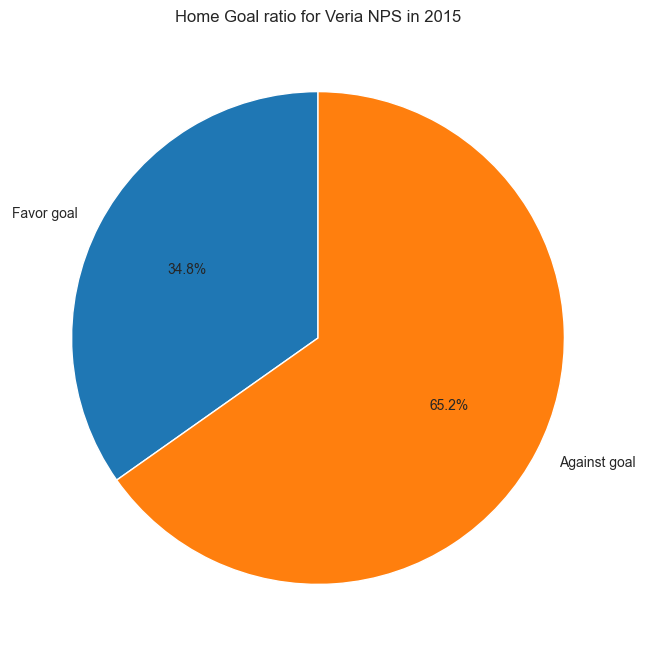

In [11]:
piegraphic_goals(clubsInfoHome, "home")

In [12]:
clubsInfoAway = clubYearGoals(db, name, year, "away")
print(clubsInfoAway)

(15, 22)


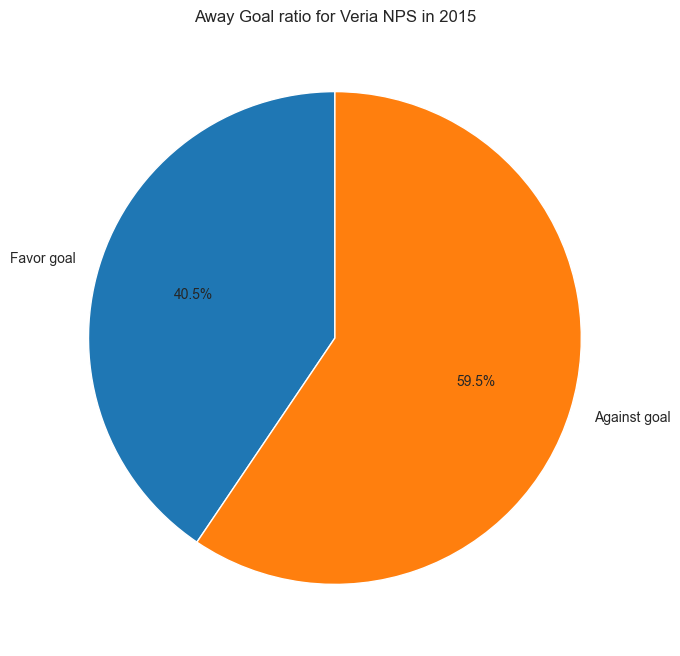

In [13]:
piegraphic_goals(clubsInfoAway, "away")

3. NUMBER OF NATIONAL PLAYERS OF THE TEAMS OF A CERTAIN COMPETITION

Function that given a competition returns the name and the numer of the national players in the teams of the competition

In [14]:
def getClubNameAndNumberOfNationalPlayers(db, competition):
    try:
        collection = db["clubs"]
        query = {"domestic_competition_id": competition}
        clubs = list(collection.find(query))
        club_info_list = [{"name": item.get("name"), "national_team_players": item.get("national_team_players")} for item in clubs]
        return club_info_list
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

Given a tuple of the name of the teams and the number of national player it draws a horizontal bar chat

In [15]:
def plotHorizontalBarChart(data):
    names = [item["name"] for item in data]
    players = [item["national_team_players"] for item in data]

    
    plt.figure(figsize=(10, len(data) // 2))

    plt.barh(names, players)
    plt.xlabel("National Team Players")
    plt.ylabel("Name")
    plt.title("National Team Players by Name")
    plt.show()


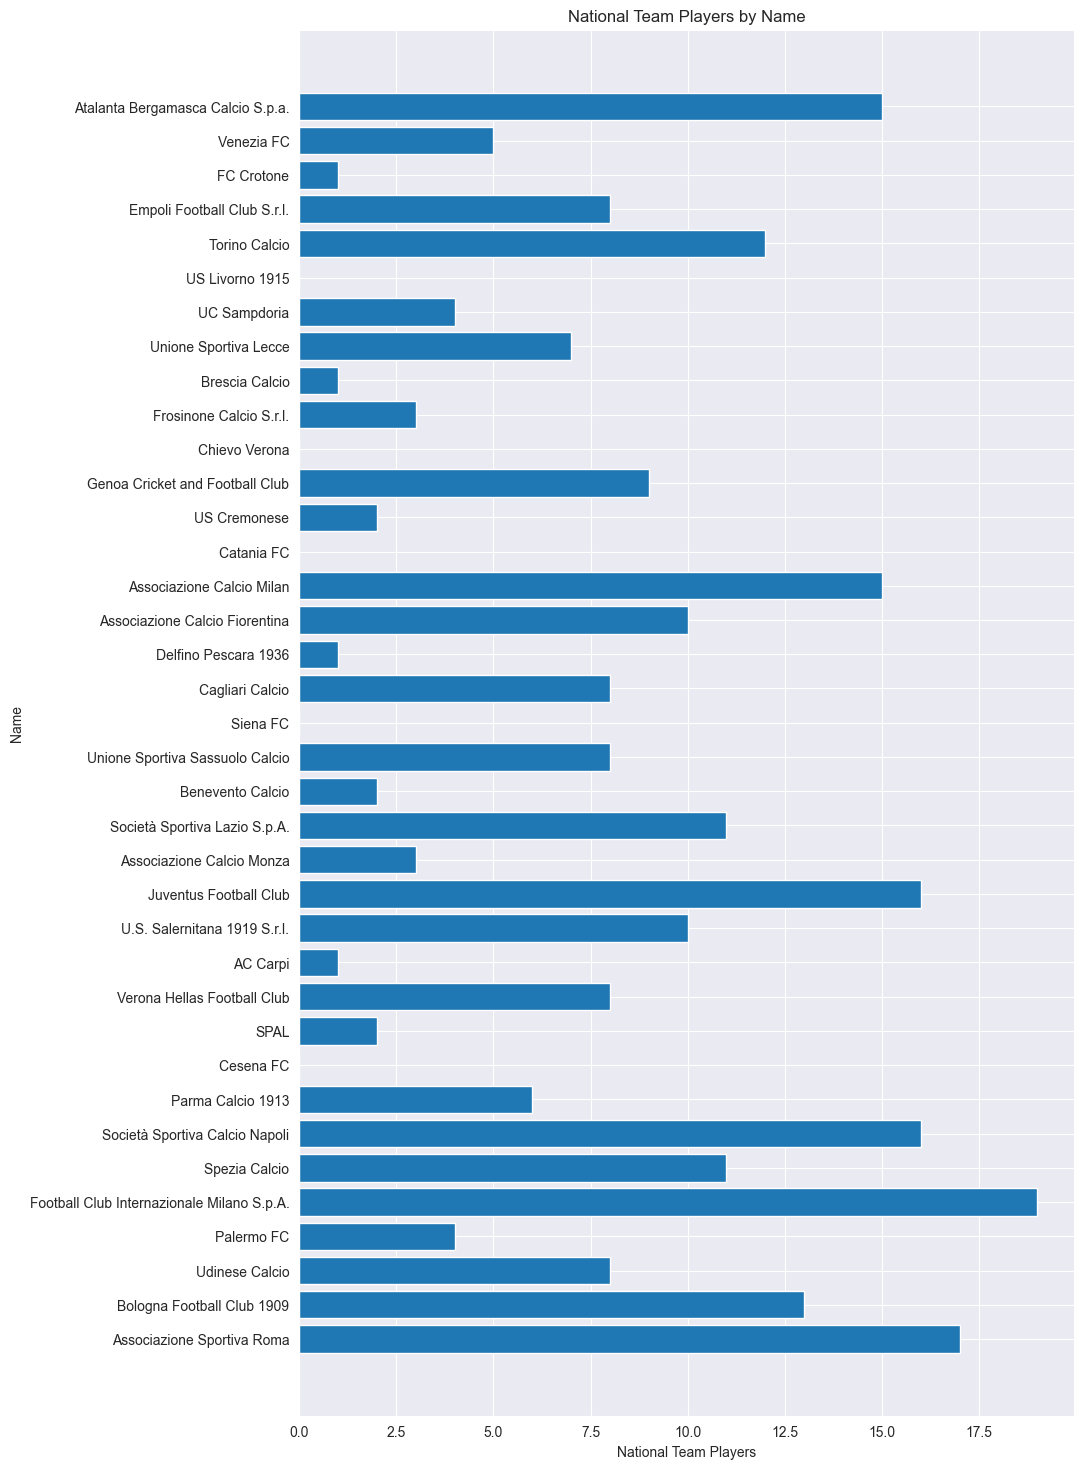

In [16]:
data = getClubNameAndNumberOfNationalPlayers(db,"IT1")
plotHorizontalBarChart(data)

4. THE MOST VALUE PLAYERS IN A COMPETICION

Function that returns the name of a player by his ID

In [17]:
def playerName(db, id):
     try:
        collection = db["players"]
        query = {"player_id": id}
        player_name = list(collection.find(query, {"name": 1}))
        return player_name[0].get("name")
     except Exception as e:
        print(f"Retrieval of values failed: {e}")
        return []

Function that given a competition returns the value, name and the year of the value for the first 200 highest values of players in a competition

In [18]:
def getMoreValuePlayerCompetition(db, competition):
    try:
        collection = db["player_valuations"]
        query = {"player_club_domestic_competition_id": competition}
        value_players = list(collection.find(query).sort("market_value_in_eur", -1).limit(200))
        name_value = [{"name": playerName(db, item.get("player_id")), "value": item.get("market_value_in_eur"), "date": item.get("date")} for item in value_players]
        
        max_value = {}

        for player in name_value:
            name = player['name']
            value = player['value']
            date = player['date']
        
            if name in max_value:
                if value > max_value[name]['value']:
                    max_value[name] = {'value': value, 'date': date}
            else:
                max_value[name] = {'value': value, 'date': date}
        
        player_value_list = [{'name': name, 'value': data['value'], 'date': data['date'].strftime('%Y')} for name, data in max_value.items()]

        
        return player_value_list
    except Exception as e:
            print(f"Retrieval of values failed: {e}")
            return []

Function that given a competition and a list of name, value, and year of value of a competition draws a bar chart graphic

In [19]:
def plotGraphValues(data, competition):
    df = pd.DataFrame(data)

    df['date'] = pd.to_datetime(df['date']).dt.year

    df = df.sort_values(by=['date', 'name'])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='name', y='value', hue='date', data=df, palette='viridis', errorbar=None)

    plt.xlabel('Player')
    plt.ylabel('Value of Market (in millions)')
    plt.title(f'Market Values of Players Over Time for {competition}')
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45, ha='right')
    
    plt.yticks(plt.yticks()[0], [f'{round(y/1000000)}M' for y in plt.yticks()[0]])

    plt.tight_layout()
    plt.show()

In [20]:
data = getMoreValuePlayerCompetition(db,"ES1")
print(data)

[{'name': 'Eden Hazard', 'value': 150000000, 'date': '2018'}, {'name': 'Antoine Griezmann', 'value': 150000000, 'date': '2018'}, {'name': 'Vinicius Junior', 'value': 150000000, 'date': '2023'}, {'name': 'Jude Bellingham', 'value': 120000000, 'date': '2023'}, {'name': 'Pedri', 'value': 100000000, 'date': '2023'}, {'name': 'Rodrygo', 'value': 100000000, 'date': '2023'}, {'name': 'Federico Valverde', 'value': 100000000, 'date': '2023'}, {'name': 'João Félix', 'value': 100000000, 'date': '2021'}, {'name': 'Jan Oblak', 'value': 100000000, 'date': '2019'}, {'name': 'Saúl Ñíguez', 'value': 90000000, 'date': '2019'}, {'name': 'Luis Suárez', 'value': 90000000, 'date': '2016'}, {'name': 'Gareth Bale', 'value': 90000000, 'date': '2016'}, {'name': 'Marc-André ter Stegen', 'value': 90000000, 'date': '2019'}, {'name': 'Frenkie de Jong', 'value': 90000000, 'date': '2021'}, {'name': 'Gavi', 'value': 90000000, 'date': '2023'}, {'name': 'Robert Lewandowski', 'value': 90000000, 'date': '2018'}, {'name': 

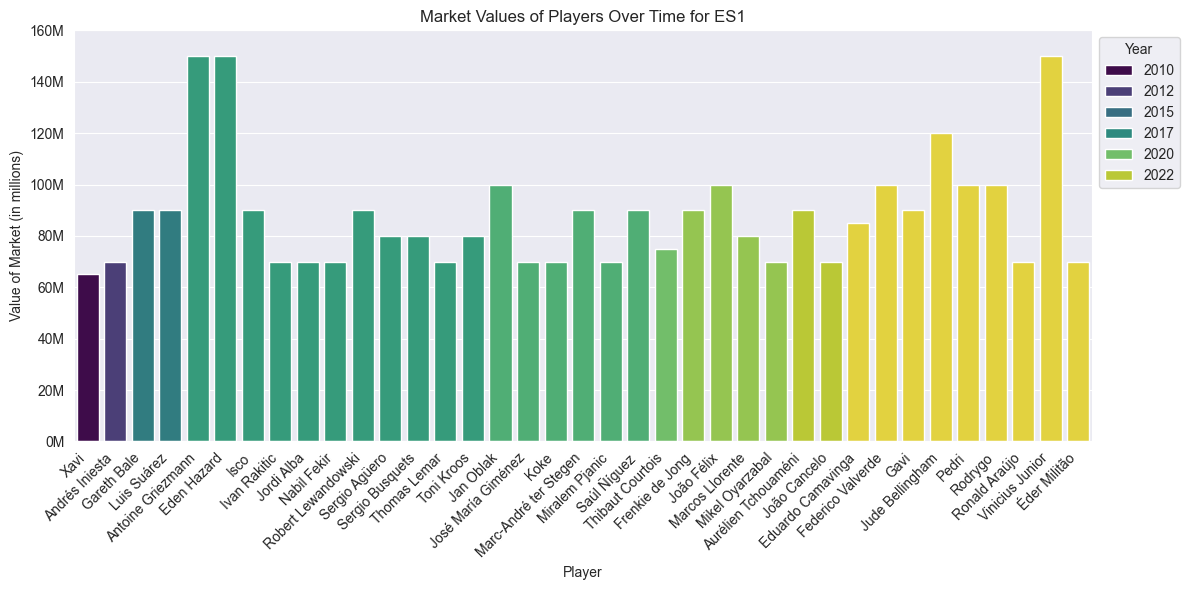

In [21]:
plotGraphValues(data,"ES1")

5.PLAYERS THAT HAVE ONE OR MORE HATTRICKS IN A CERTAIN COMPETITION

a. Function that given a competition_id gives back the name of a hattrick scorer and the number of goals (3 always)

In [22]:
def getPlayerNameAndSumHattricks(db, competition_id):
    try:
        collection = db["appearances"]
        query = {"competition_id": competition_id, "goals": 3}
        hattricks = list(collection.find(query))
        hattricks_score = [{"player": item.get("player_name"), "goals": item.get("goals")} for item in hattricks]
        return hattricks_score
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

In [23]:
s = getPlayerNameAndSumHattricks(db, "ES1")
s

[{'player': 'Radamel Falcao', 'goals': 3},
 {'player': 'Cristiano Ronaldo', 'goals': 3},
 {'player': 'Lionel Messi', 'goals': 3},
 {'player': 'Xabi Prieto', 'goals': 3},
 {'player': 'Cristiano Ronaldo', 'goals': 3},
 {'player': 'Cristiano Ronaldo', 'goals': 3},
 {'player': 'Álvaro Negredo', 'goals': 3},
 {'player': 'Cesc Fàbregas', 'goals': 3},
 {'player': 'Lionel Messi', 'goals': 3},
 {'player': 'Mounir El Hamdaoui', 'goals': 3},
 {'player': 'Pedro', 'goals': 3},
 {'player': 'Cristiano Ronaldo', 'goals': 3},
 {'player': 'Youssef El Arabi', 'goals': 3},
 {'player': 'Cristiano Ronaldo', 'goals': 3},
 {'player': 'Sergio García', 'goals': 3},
 {'player': 'Gareth Bale', 'goals': 3},
 {'player': 'Jonas', 'goals': 3},
 {'player': 'Javi Guerra', 'goals': 3},
 {'player': 'Pedro', 'goals': 3},
 {'player': 'Alexis Sánchez', 'goals': 3},
 {'player': 'Ikechukwu Uche', 'goals': 3},
 {'player': 'Aritz Aduriz', 'goals': 3},
 {'player': 'Lionel Messi', 'goals': 3},
 {'player': 'Lionel Messi', 'goals':

b. Function that given the previous list, returns for each element of the list the player and his number of hattricks. There are not duplicated elements.

In [24]:
def setNumberOfHattricks(list):
    appearances = {}

    for element in list:
        player = element['player']
        appearances[player] = appearances.get(player, 0) + 1

    new_list = []
    for element in list:
        player = element['player']
        total_hattricks = appearances[player]
        element['total_hattricks'] = total_hattricks
        if element not in new_list:
            new_list.append(element)

    hattricks_list = [{"player": item.get("player"), "hattricks": item.get("total_hattricks")} for item in new_list]

    return hattricks_list

In [25]:
hattricks_register = setNumberOfHattricks(s)
hattricks_register

[{'player': 'Radamel Falcao', 'hattricks': 1},
 {'player': 'Cristiano Ronaldo', 'hattricks': 15},
 {'player': 'Lionel Messi', 'hattricks': 19},
 {'player': 'Xabi Prieto', 'hattricks': 1},
 {'player': 'Álvaro Negredo', 'hattricks': 1},
 {'player': 'Cesc Fàbregas', 'hattricks': 1},
 {'player': 'Mounir El Hamdaoui', 'hattricks': 1},
 {'player': 'Pedro', 'hattricks': 2},
 {'player': 'Youssef El Arabi', 'hattricks': 2},
 {'player': 'Sergio García', 'hattricks': 1},
 {'player': 'Gareth Bale', 'hattricks': 2},
 {'player': 'Jonas', 'hattricks': 1},
 {'player': 'Javi Guerra', 'hattricks': 1},
 {'player': 'Alexis Sánchez', 'hattricks': 1},
 {'player': 'Ikechukwu Uche', 'hattricks': 1},
 {'player': 'Aritz Aduriz', 'hattricks': 3},
 {'player': 'Neymar', 'hattricks': 2},
 {'player': 'Carlos Vela', 'hattricks': 1},
 {'player': 'Antoine Griezmann', 'hattricks': 3},
 {'player': 'David Barral', 'hattricks': 2},
 {'player': 'Luis Suárez', 'hattricks': 9},
 {'player': 'Imanol Agirretxe', 'hattricks': 1},

c. Function to draw a dispersion graphic for this particular case.

In [26]:
def getDispersionGraphicForHattricks(list_hattricks):
    players = [player['player'] for player in list_hattricks]
    hattricks = [player['hattricks'] for player in list_hattricks]

    plt.figure(figsize=(12, 8))
    
    plt.scatter(players, hattricks, color='blue')

    plt.title('Hattricks per Player')
    plt.xlabel('Players')
    plt.ylabel('Number of Hattricks')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mayor legibilidad

    plt.tight_layout()
    plt.show()

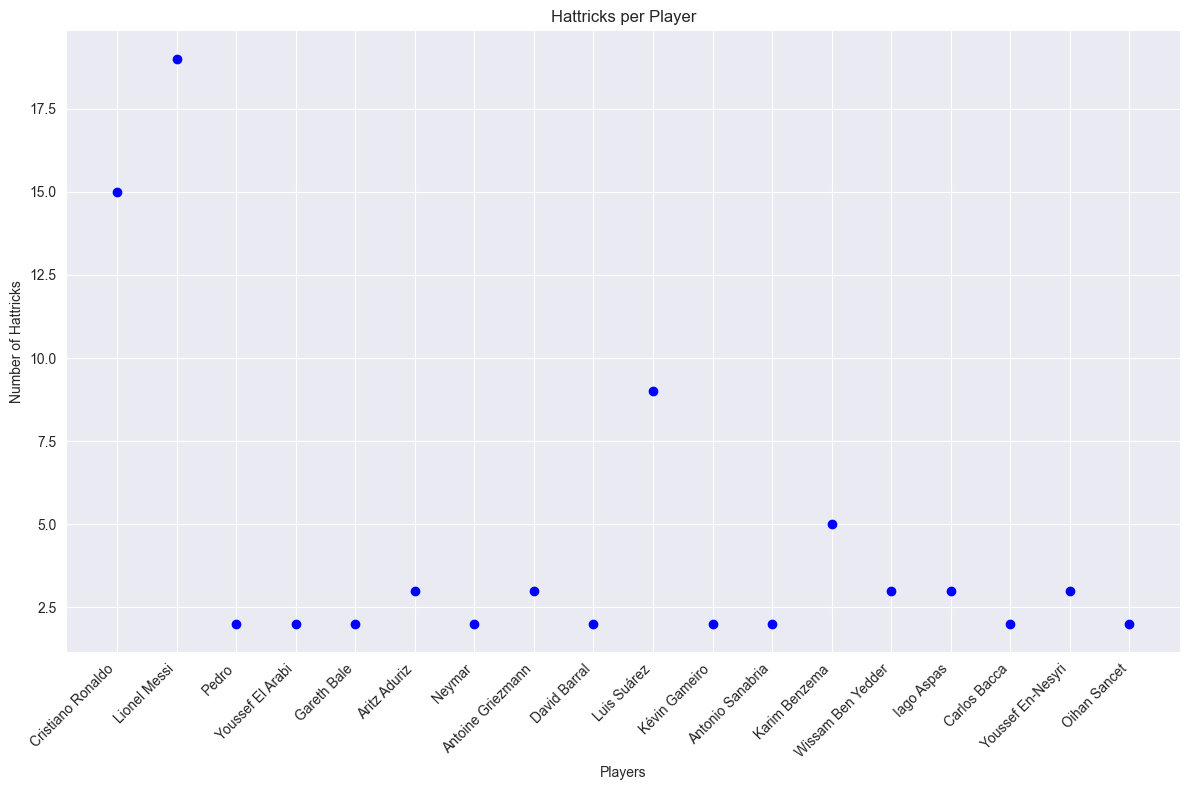

In [27]:
hattricks_register = [element for element in hattricks_register if element['hattricks'] >= 2] #For a better visualization of the graphic, it has been decided to show only the players who have 2 or more hattricks.
getDispersionGraphicForHattricks(hattricks_register)

6. COMPARATION OF AVERAGE GOALS OF EACH OF THE 5 BIG EUROPEAN LEAGUES SINCE A CERTAIN YEAR

a. Function that given a competition and a year gives us the number of home and away goals.

In [28]:
def getHomeAndAwayGoals(db, competition_id, year):
    try:
        collection = db["games"]
        query = {"competition_id": competition_id, "season": year}
        results = list(collection.find(query))
        results_filtered = [{"competition": item.get("competition_id"), "home_goals": item.get("home_club_goals"), 
                             "away_goals": item.get("away_club_goals"), "year": item.get("season")} for item in results]
        return results_filtered

        #hattricks_list = [{"player": item.get("player"), "hattricks": item.get("total_hattricks")} for item in new_list]
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

In [29]:
s = getHomeAndAwayGoals(db,"IT1",2012)
s

[{'competition': 'IT1', 'home_goals': 0, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 1, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 3, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 5, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 0, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 4, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 4, 'away_goals': 2, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 1, 'away_goals': 1, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 2, 'away_goals': 3, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 0, 'away_goals': 2, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 2, 'away_goals': 0, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 1, 'away_goals': 3, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 0, 'away_goals': 2, 'year': 2012},
 {'competition': 'IT1', 'home_goals': 3, 'away_goal

b. Modification of the list so that we can get for each match of the competition in a year the number of goals

In [30]:
def getGoalsInMatch(list):
    for match in list:
        match['goals_in_match'] = match['home_goals'] + match['away_goals']
        del match['home_goals']
        del match['away_goals']
    return list

l = getGoalsInMatch(s)
l

[{'competition': 'IT1', 'year': 2012, 'goals_in_match': 1},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 2},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 4},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 6},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 1},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 5},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 6},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 2},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 5},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 2},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 2},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 4},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 2},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 3},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 4},
 {'competition': 'IT1', 'year': 2012, 'goals_in_match': 1},
 {'competition': 'IT1', 'year': 2012, 'g

c. Function that given the previous list returns the average goals of a season of certain competition.

In [31]:
def getAverageGoals(list):
    # Calcular la media de 'goals_in_match'
    total_goals = sum(match['goals_in_match'] for match in list)
    average_goals = round(total_goals / len(list), 2)

    elem = {'competition': list[0]['competition'], 'year': list[0]['year'], 'average_goals_in_match': average_goals}
    return elem

In [32]:
elem = getAverageGoals(l)
elem

{'competition': 'IT1', 'year': 2012, 'average_goals_in_match': 2.64}

d. Getting the information of each of the 5 leagues for the graphic

In [33]:
#SPANISH LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"ES1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"ES1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"ES1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"ES1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_spain = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_spain

[{'competition': 'ES1', 'year': 2020, 'average_goals_in_match': 2.51},
 {'competition': 'ES1', 'year': 2021, 'average_goals_in_match': 2.5},
 {'competition': 'ES1', 'year': 2022, 'average_goals_in_match': 2.51},
 {'competition': 'ES1', 'year': 2023, 'average_goals_in_match': 2.82}]

In [34]:
#ITALIAN LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"IT1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"IT1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"IT1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"IT1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_italy = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_italy

[{'competition': 'IT1', 'year': 2020, 'average_goals_in_match': 3.06},
 {'competition': 'IT1', 'year': 2021, 'average_goals_in_match': 2.87},
 {'competition': 'IT1', 'year': 2022, 'average_goals_in_match': 2.56},
 {'competition': 'IT1', 'year': 2023, 'average_goals_in_match': 2.56}]

In [35]:
#ENGLISH LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"GB1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"GB1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"GB1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"GB1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_england = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_england

[{'competition': 'GB1', 'year': 2020, 'average_goals_in_match': 2.69},
 {'competition': 'GB1', 'year': 2021, 'average_goals_in_match': 2.82},
 {'competition': 'GB1', 'year': 2022, 'average_goals_in_match': 2.85},
 {'competition': 'GB1', 'year': 2023, 'average_goals_in_match': 3.11}]

In [36]:
#GERMAN LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"FR1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"FR1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"FR1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"FR1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_france = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_france

[{'competition': 'FR1', 'year': 2020, 'average_goals_in_match': 2.76},
 {'competition': 'FR1', 'year': 2021, 'average_goals_in_match': 2.81},
 {'competition': 'FR1', 'year': 2022, 'average_goals_in_match': 2.81},
 {'competition': 'FR1', 'year': 2023, 'average_goals_in_match': 2.53}]

In [37]:
#GERMAN LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"L1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"L1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"L1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"L1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_germany = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_germany

[{'competition': 'L1', 'year': 2020, 'average_goals_in_match': 3.03},
 {'competition': 'L1', 'year': 2021, 'average_goals_in_match': 3.12},
 {'competition': 'L1', 'year': 2022, 'average_goals_in_match': 3.17},
 {'competition': 'L1', 'year': 2023, 'average_goals_in_match': 3.51}]

In [38]:
def drawPlot(average_spain, average_italy, average_germany, average_france, average_england):
    color_map = {average_spain[0]["competition"]: 'blue', average_italy[0]["competition"]: 'green', 
                 average_germany[0]["competition"]: 'red', average_france[0]["competition"]: 'yellow',
                 average_england[0]["competition"]: 'orange'}  # Agrega más competiciones según sea necesario

    plt.figure(figsize=(10, 6))

    for competition_data in [average_spain, average_italy, average_germany, average_france, average_england]:
        competition_name = competition_data[0]["competition"]
        color = color_map.get(competition_name, 'black')
        years = [entry['year'] for entry in competition_data]
        average_goals = [entry['average_goals_in_match'] for entry in competition_data]
        for year, avg_goals in zip(years, average_goals):
            plt.plot(years, average_goals, label=competition_name, color=color, marker='o')
            plt.text(year, avg_goals, f'{avg_goals:.2f}', ha='left', va='bottom', fontsize=8, color=color)



    plt.title('Average Goals per Match Over Years in the Big 5 European Leagues')
    plt.xlabel('Year')
    plt.ylabel('Average Goals per Match')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

    plt.tight_layout()
    plt.show()

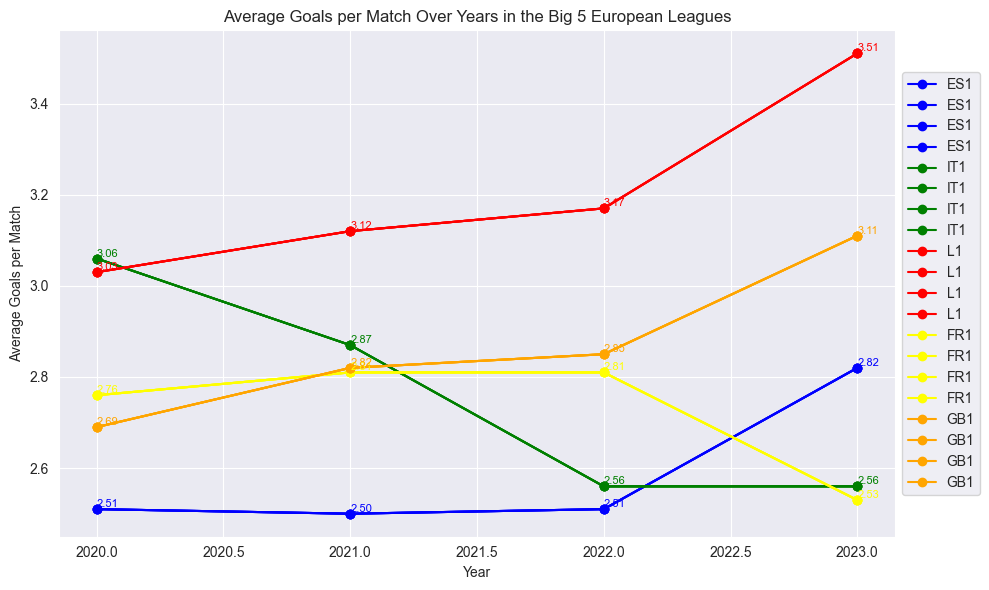

In [39]:
drawPlot(average_goals_spain, average_goals_italy, average_goals_germany, average_goals_france, average_goals_england)

7. GOAL EVOLUTION OF A PLAYER OVER THE YEARS

a. Function that takes game_id of a single season.

In [82]:
def getGameIDsFromSeason(db, season):
    try: 
        collection = db["games"]
        query = {"season": season}
        results = list(collection.find(query))
        results_filtered = [{"game_id": item.get("game_id"), "year": season} for item in results]
        return results_filtered
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

In [100]:
games = getGameIDsFromSeason(db, 2012)
player_id = 28003

b. Function that gets the appearances of a certain player.

In [101]:
def getPlayerAppearances(db, player_id):
    try:
        collection = db["appearances"]
        query = {"player_id": player_id}
        player_appearances = list(collection.find(query))
        results_filtered = [{"game": item.get("game_id"), "player": item.get("player_id"), "goals": item.get("goals")} for item in player_appearances]
        return results_filtered
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

c. In the next cell we take out of the player appearances those appearances whose game_id is not included in the 'games' list.

In [102]:
def filterPlayerAppearances(the_games, the_player_appearances):
    player_appearances = getPlayerAppearances(db, player_id)
    game_ids = {game['game_id'] for game in the_games}
    
    # Filter player_appearances
    filtered_player_appearances = [appearance for appearance in the_player_appearances if appearance['game'] in game_ids]
    
    # Añadir el campo 'year' con el valor 2022 a cada elemento
    for item in filtered_player_appearances:
        item['year'] = the_games[0]['year']
    return filtered_player_appearances

d. It is calculated now the total goals of a player in a certain year.

In [103]:
def getPlayerAppereancesInSeason(list):
    sum_goals = sum(entry['goals'] for entry in list)
    
    goals_player_year = {'game':list[0]['game'],'player':list[0]['player'],'total_goals':sum_goals, 'year':list[0]['year']}
    return goals_player_year

In [104]:
total_appearances = getPlayerAppearances(db,player_id)

games_2012 = getGameIDsFromSeason(db, 2012)
games_2013 = getGameIDsFromSeason(db, 2013)
games_2014 = getGameIDsFromSeason(db, 2014)
games_2015 = getGameIDsFromSeason(db, 2015)
games_2016 = getGameIDsFromSeason(db, 2016)
games_2017 = getGameIDsFromSeason(db, 2017)
games_2018 = getGameIDsFromSeason(db, 2018)
games_2019 = getGameIDsFromSeason(db, 2019)
games_2020 = getGameIDsFromSeason(db, 2020)
games_2021 = getGameIDsFromSeason(db, 2021)
games_2022 = getGameIDsFromSeason(db, 2022)

appearances_in_games_2012 = filterPlayerAppearances(games_2012, total_appearances)
appearances_in_games_2013 = filterPlayerAppearances(games_2013, total_appearances)
appearances_in_games_2014 = filterPlayerAppearances(games_2014, total_appearances)
appearances_in_games_2015 = filterPlayerAppearances(games_2015, total_appearances)
appearances_in_games_2016 = filterPlayerAppearances(games_2016, total_appearances)
appearances_in_games_2017 = filterPlayerAppearances(games_2017, total_appearances)
appearances_in_games_2018 = filterPlayerAppearances(games_2018, total_appearances)
appearances_in_games_2019 = filterPlayerAppearances(games_2019, total_appearances)
appearances_in_games_2020 = filterPlayerAppearances(games_2020, total_appearances)
appearances_in_games_2021 = filterPlayerAppearances(games_2021, total_appearances)
appearances_in_games_2022 = filterPlayerAppearances(games_2022, total_appearances)

goals_2012 = getPlayerAppereancesInSeason(appearances_in_games_2012)
goals_2013 = getPlayerAppereancesInSeason(appearances_in_games_2013)
goals_2014 = getPlayerAppereancesInSeason(appearances_in_games_2014)
goals_2015 = getPlayerAppereancesInSeason(appearances_in_games_2015)
goals_2016 = getPlayerAppereancesInSeason(appearances_in_games_2016)
goals_2017 = getPlayerAppereancesInSeason(appearances_in_games_2017)
goals_2018 = getPlayerAppereancesInSeason(appearances_in_games_2018)
goals_2019 = getPlayerAppereancesInSeason(appearances_in_games_2019)
goals_2020 = getPlayerAppereancesInSeason(appearances_in_games_2020)
goals_2021 = getPlayerAppereancesInSeason(appearances_in_games_2021)
goals_2022 = getPlayerAppereancesInSeason(appearances_in_games_2022)

goals_years = [goals_2012,goals_2013,goals_2014,goals_2015,goals_2016,goals_2017,goals_2018,goals_2019,goals_2020,goals_2021,goals_2022]

In [105]:
def drawFillPlot(goals_year):    
    years = [elemento['year'] for elemento in goals_year]
    total_goals = [elemento['total_goals'] for elemento in goals_year]
    
    plt.fill_between(years, 0, total_goals, alpha=0.5)
    
    plt.title('Diagrama de Áreas')
    plt.xlabel('Año')
    plt.ylabel('Total Goals')
    plt.grid(True)
    
    plt.show()


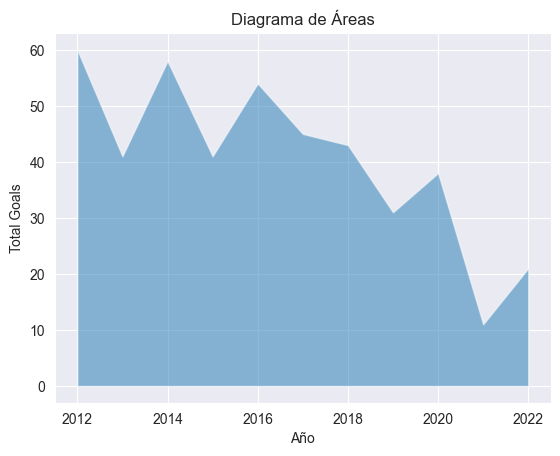

In [106]:
drawFillPlot(goals_years)